<a href="https://colab.research.google.com/github/sigvehaug/DSF-DCBP/blob/main/CodingTask1_Sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science Fundamentals for DCBP, S. Haug, University of Bern 

# Coding Task 1

- Deadline: Send your solution notebook per email to Sigve by 2023-03-22 17:00
- Estimated effort: 2-5 hours (if you don't progress after 2 hours of trying, search for help, ChatGPT, Google, colleagues, course tutor)
- Data on Ilias: CCD-Data with metadata file CCD-Metadata


## Tasks (maximum 12.5 points)

- **CT-1.1** Write a method (function) which removes the header information in the 
datafile and saves that information into a separate textfile. [0.5 points] 
- **CT-1.2** Write a function which reduces the data resolution by merging/averaging columns such that there is only one column per 1 nm. [2.0 points]  
- **CT-1.3** Now generalize the above merging so that it works for any number of nm per column. [2.0 points]
- **CT-1.4** Implement the saving of the reduced dataset to a file. Do this (1) by writing an explicit loop (write line by line) and (2) by using pandas methods. Measure the running times of the two approaches. [2.0 points]
- **CT-1.5** Write a function which takes two wavelengths as input and plots the difference of the data at these lengths over time. [2.0 points] 
- **CT-1.6** Let the x-axis be in seconds, label the axes with names and units, label the plot with color and legend, make a title for the plot. Save the plot to a file. [2.0 points]
- **CT-1.7** Plot the full and some reduced datasets in the same figure. Is there any visual difference? [2.0 points]

In [1]:
# CT-1.1
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Courses/DSF-DCBP/Data-CCD/CCD-Data.csv'

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv(path,delimiter=',')
df.head() 
df.to_csv('CCD-Data-Clean.csv')

,Unnamed: 0.1,Unnamed: 0,Unnamed: 1,316.6137,316.7492,316.8847,317.0203,317.1558,317.2913,317.4268,...,778.9703,779.089,779.2076,779.3263,779.4449,779.5636,779.6822,779.8008,779.9194,780.0381
0,0,2018-10-25 10:32:04.789000,1540456324789,0.329672,0.329672,0.329672,0.090294,-0.716926,-1.829304,-0.686330,...,-0.038483,-0.039623,-0.036920,-0.037309,-0.037299,-0.037476,-0.036856,-0.036853,-0.039100,-0.035545
1,1,2018-10-25 10:32:04.878000,1540456324878,-0.044412,-0.044412,-0.044412,0.157632,-0.672423,-2.183981,-0.492421,...,-0.039428,-0.038486,-0.037309,-0.036357,-0.037289,-0.038728,-0.037214,-0.036902,-0.040210,-0.038165
2,2,2018-10-25 10:32:04.962000,1540456324962,0.338219,0.338219,0.338219,0.330993,-0.879836,-0.000000,-0.559845,...,-0.037725,-0.037534,-0.036560,-0.036152,-0.036554,-0.036875,-0.037351,-0.036746,-0.038686,-0.036903
3,3,2018-10-25 10:32:05.046000,1540456325046,-0.049682,-0.049682,-0.049682,0.519086,-0.681150,-0.000000,-0.417230,...,-0.037613,-0.037168,-0.036369,-0.034549,-0.036252,-0.037948,-0.036713,-0.035706,-0.038203,-0.036822
4,4,2018-10-25 10:32:05.129000,1540456325129,0.335086,0.335086,0.335086,-0.041393,-0.000000,-1.802774,-0.510417,...,-0.040919,-0.038288,-0.035840,-0.035638,-0.039504,-0.040093,-0.039953,-0.037656,-0.038082,-0.035900


In [25]:
# CT-1.2
import math
new_df = df.iloc[:,3:-1]
new_columns = {col: math.floor(float(col)) for col in new_df.columns}
new_df = new_df.rename(columns=new_columns)
red_df = new_df.groupby(new_df.columns,axis=1).mean()
red_df.head()

,316,317,318,319,320,321,322,323,324,325,...,770,771,772,773,774,775,776,777,778,779
0,0.329672,-0.166957,-0.064746,0.133130,0.123705,-0.249831,0.271327,-0.093151,-0.123458,-0.026454,...,-0.038470,-0.038555,-0.038021,-0.039290,-0.038654,-0.036496,-0.038835,-0.038145,-0.038333,-0.037679
1,-0.044412,-0.411839,-0.133472,2.032979,-0.387814,-0.031617,0.322955,1.744725,-0.051639,-0.147937,...,-0.038387,-0.038100,-0.038118,-0.038622,-0.038308,-0.036896,-0.039010,-0.038400,-0.037930,-0.037812
2,0.338219,-0.094507,-0.024912,0.061890,-0.226986,0.107871,0.121011,-0.208504,-0.418836,0.005751,...,-0.038472,-0.038063,-0.038303,-0.039200,-0.038397,-0.036932,-0.038245,-0.037664,-0.037514,-0.037057
3,-0.049682,0.027980,-0.008338,-0.088350,0.070348,-0.013674,0.307321,0.159532,-0.047932,0.080549,...,-0.037574,-0.037775,-0.037678,-0.038711,-0.038133,-0.036972,-0.038177,-0.037273,-0.036996,-0.036614
4,0.335086,-0.162378,-0.102281,0.045717,-0.088278,0.042099,0.304675,-0.261077,-0.009424,0.153932,...,-0.038489,-0.038433,-0.038135,-0.038991,-0.038178,-0.037010,-0.038540,-0.038076,-0.037606,-0.038132


In [42]:
# CT-1.3
import math
def merge_df(df,nm_s,nm_n):
  new_df = df.iloc[:,3:-1]
  # Merge columns into one nm columns
  new_columns = {col: math.floor(float(col)) for col in new_df.columns}
  new_df = new_df.rename(columns=new_columns)
  new_df = new_df.groupby(new_df.columns,axis=1).mean()
  # Merge nm_n columns into one column
  new_columns = {col: (float(col)-nm_s)//nm_n for col in new_df.columns}
  new_df = new_df.rename(columns=new_columns)
  new_df = new_df.groupby(new_df.columns,axis=1).mean()
  # Fix the column labels
  new_columns = {col: int((float(col)*nm_n+nm_s)) for col in new_df.columns}
  new_df = new_df.rename(columns=new_columns)
  return new_df
df_red = merge_df(df,316,5) # Start wavelength and number of wavelengths to merge
df_red.head()

,316,321,326,331,336,341,346,351,356,361,...,731,736,741,746,751,756,761,766,771,776
0,0.070961,-0.044313,-0.009806,0.086324,0.031754,0.106784,0.177783,0.210109,0.358716,0.344410,...,-0.042301,-0.040614,-0.040781,-0.039739,-0.040138,-0.040400,-0.040377,-0.039398,-0.038203,-0.038248
1,0.211088,0.367297,-0.063428,0.129758,0.164445,0.182806,0.774499,0.372352,0.498966,0.423509,...,-0.042207,-0.040745,-0.040961,-0.039872,-0.040630,-0.040572,-0.040384,-0.039750,-0.038009,-0.038288
2,0.010741,-0.078541,0.025819,0.110489,0.100067,0.209942,0.248444,0.368889,0.403569,0.453605,...,-0.042254,-0.041056,-0.040920,-0.039698,-0.040577,-0.040829,-0.040795,-0.039480,-0.038179,-0.037620
3,-0.009608,0.097159,-0.013775,0.074013,0.054955,0.071567,0.245050,0.262848,0.343486,0.331592,...,-0.041748,-0.039954,-0.040570,-0.039321,-0.039786,-0.039894,-0.039903,-0.038639,-0.037854,-0.037265
4,0.005573,0.046041,-0.008014,0.162503,0.165882,0.046115,0.133982,0.244883,0.377935,0.287445,...,-0.042183,-0.040433,-0.040473,-0.039563,-0.040364,-0.040291,-0.040072,-0.039435,-0.038149,-0.038088


In [ ]:
new_df.columns

Int64Index([316, 316, 316, 317, 317, 317, 317, 317, 317, 317,
            ...
            778, 778, 779, 779, 779, 779, 779, 779, 779, 779],
           dtype='int64', length=3647)

In [5]:
# CT-1.4
%%time
red_df.to_csv('CCD-Data-Clean.csv')


CPU times: user 6.59 ms, sys: 1.99 ms, total: 8.58 ms
Wall time: 9.17 ms


In [6]:
# CT-1.4
%%time
f_in  = open('CCD-Data-Clean.csv','r')
f_out = open('CCD-Data-CT14.txt','w')
lines = f_in.readlines()
for line in lines:
    f_out.writelines(line)



CPU times: user 6.39 ms, sys: 0 ns, total: 6.39 ms
Wall time: 8.41 ms


There seems to be no significant difference between the two ways.

0

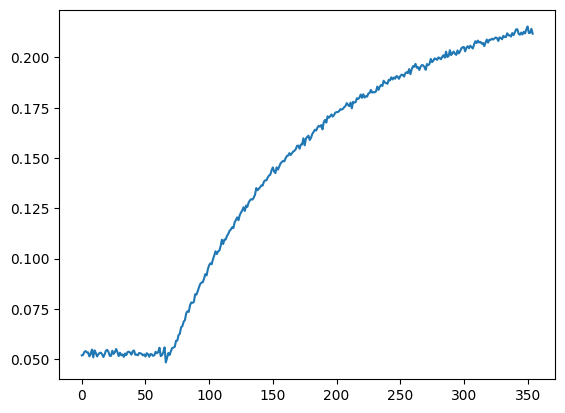

In [7]:
# CT-1.5
import matplotlib.pyplot as plt
def plotWL(a,b):
  # Takes column numbers, not labels as input
  x = df.iloc[:,0]
  y = - (df.iloc[:,b]-df.iloc[:,a])
  plt.plot(x,y)
  return 0 
plotWL(1750,1950) 

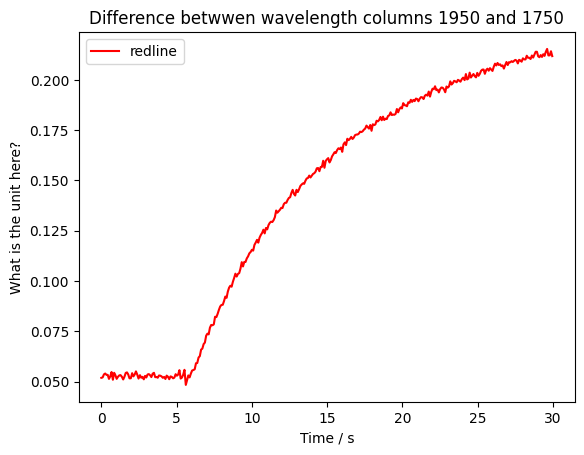

In [51]:
# CT-1.6
b = 1950
a = 1750
# Subtract with the ms value in the first row (0) and normalise to seconds
x = (df.iloc[:,2]-df.iloc[0,2])/1000
y = -(df.iloc[:,b]-df.iloc[:,a])
plt.plot(x,y,c='r',label='redline')
plt.xlabel('Time / s')
plt.ylabel('What is the unit here?')
plt.title('Difference betwwen wavelength columns '+str(b)+' and '+str(a))
plt.legend()
plt.savefig('myplot.png')
plt.show()

In [57]:
# CT-1.7
a_df = merge_df(df,316,5)
b_df = merge_df(df,316,10)
# If you like, you can finalize this solution yourself 



There is a difference between the not compressed and the compressed data. Does it have to do with the not exact wavelength transformation when compressing or is it a real difference. We would have to investigate further.